# Data loading
### Data Info 
Columns: The first six columns represent the different pages in the e-commerce website visited by a user from other sites.

HomePage: Number of times visited this page

HomePage_Duration: Total number of duration spent on this page.

LandingPage: Number of times visited this page

LandingPage_Duration: Total number of duration spent on this page.

ProductDesriptionPage Number of times visited this page

ProductDescriptionPage_Duration: Total number of duration spent on this page.

GoogleMetric-Bounce Rate: Whenever a user comes to any one web-page of the website and he/she does not go to any other page and exits from the website from the same page, then this activity done by the user is called Bounce. And the percentage of the total number of times the user visiting our website and bounce it, is called Bounce Rate

GoogleMetric-Exit Rate: The bounce rate is calculated based on the user exiting a website after visiting one page. But some users exit from the second, third, fourth, or any other page of our website, then those visitors’ data help determine the exit rate. The percentage of the total number of times the user to our website who do not exit from the first page (Landing Page) but exit after exploring other website pages is called the Exit Rate.

GoogleMetric-Page Value: Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction.

SeasonalPurchase: It is a weight indicator to track the seasonal purchase. If a user makes a purchase during any seasonal time (Mother’s Day, Diwali, Valentine's Day), we will assign based on internal heuristic.

Month_ SeasonalPurchase: Month of the special day considered for seasonal purchase.

### Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, RandomizedSearchCV, GridSearchCV, ShuffleSplit
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score, classification_report, accuracy_score, precision_score, recall_score
from sklearn.neighbors import LocalOutlierFactor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


import warnings
warnings.filterwarnings("ignore")

np.random.seed(0)

In [2]:
# Loading the data
data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')

# Data exploration

In [3]:
data['Month_SeasonalPurchase'].sample(5)

13563    Aug
5055     Aug
13883    Nov
6107     Nov
1457     Mar
Name: Month_SeasonalPurchase, dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

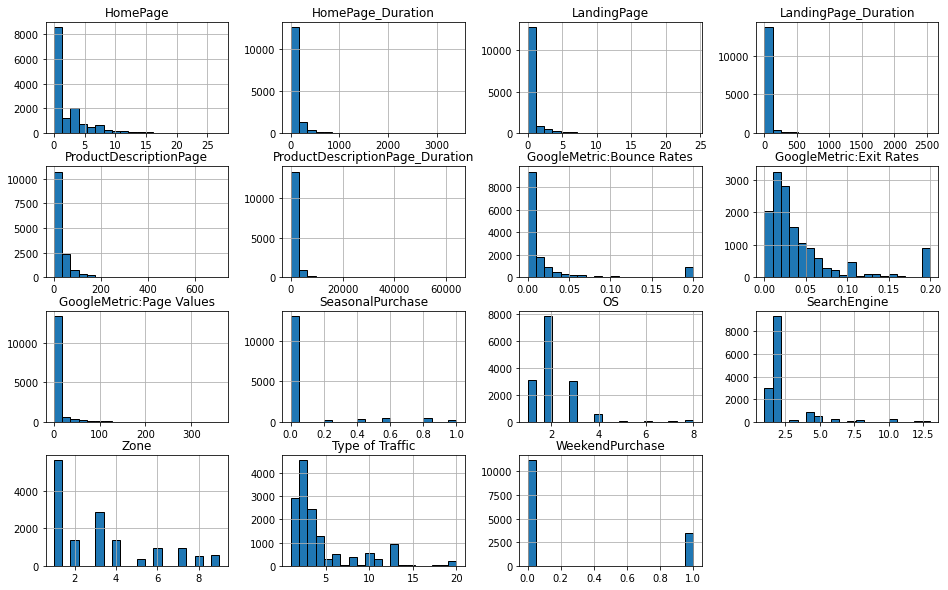

In [5]:
data.hist(bins = 20, edgecolor = 'black', figsize = (16,10))
plt.show()

In [6]:
data.isna().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

<AxesSubplot:>

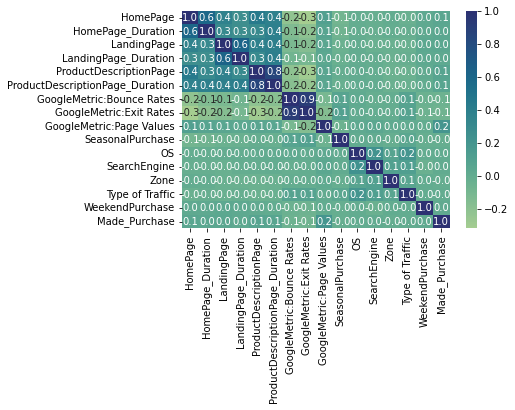

In [7]:
sns.heatmap(data.corr(), annot = True, fmt = '.1f', cmap = 'crest')

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


# Data preprocessing

In [9]:
data['Gender'] = data['Gender'].replace('Not Specified', np.nan)
data['Education'] = data['Education'].replace('Not Specified', 'Others')

In [10]:
# Splitting the data as feature and label

data_label = data.iloc[:,-1]
data_feature = data.iloc[:, :-1]

In [11]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [12]:
# Arranging the columns as all the columns with float dtype grouped together in a series and same with the object dtype columns.

columns = data_feature.columns.tolist()
new_columns = columns[0:10] + columns[11:15] + [columns[20]] + [columns[10]] + columns[15:20]
data_feature = data_feature[new_columns]

In [13]:
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  OS                               14597 non-null  float64
 11  SearchEngine                     14609 non-null  float64
 12  Zone              

In [14]:
# Looking at the unique values in categorical columns.

for i in range(15,21):
    print('Name of the feature: ', data_feature.columns[i])
    print('Unique Values: ', data_feature.iloc[:,i].unique())
    print('Number of unique values: ', len(data_feature.iloc[:,i].unique()))
    print('-')

Name of the feature:  Month_SeasonalPurchase
Unique Values:  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec' nan]
Number of unique values:  11
-
Name of the feature:  CustomerType
Unique Values:  ['Returning_Visitor' 'New_Visitor' 'Other' nan]
Number of unique values:  4
-
Name of the feature:  Gender
Unique Values:  [nan 'Female' 'Male']
Number of unique values:  3
-
Name of the feature:  Cookies Setting
Unique Values:  ['Deny' 'ALL' 'Required' nan]
Number of unique values:  4
-
Name of the feature:  Education
Unique Values:  ['Others' 'Diploma' 'Graduate' nan]
Number of unique values:  4
-
Name of the feature:  Marital Status
Unique Values:  ['Other' 'Married' 'Single' nan]
Number of unique values:  4
-


In [15]:
data_feature.isnull().sum()

HomePage                            153
HomePage_Duration                   150
LandingPage                         153
LandingPage_Duration                135
ProductDescriptionPage              123
ProductDescriptionPage_Duration     167
GoogleMetric:Bounce Rates           151
GoogleMetric:Exit Rates             129
GoogleMetric:Page Values            132
SeasonalPurchase                    150
OS                                  134
SearchEngine                        122
Zone                                117
Type of Traffic                     143
WeekendPurchase                     121
Month_SeasonalPurchase              144
CustomerType                        144
Gender                             5116
Cookies Setting                     144
Education                           136
Marital Status                      130
dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_feature, data_label, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10311, 21) (4420, 21) (10311,) (4420,)


In [17]:
from sklearn.preprocessing import RobustScaler

In [18]:
num_pipeline = Pipeline([('scaler', RobustScaler()),
                         ('knn', KNNImputer(n_neighbors = 120))])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'most_frequent')),
                        ('ohe', OneHotEncoder())])

In [19]:
y_train = pd.DataFrame(LabelEncoder().fit_transform(y_train), columns = ['Target'])

y_test = pd.DataFrame(LabelEncoder().fit_transform(y_test), columns = ['Target'])

In [20]:
full_pipeline = ColumnTransformer([('num', num_pipeline, slice(0,15)),
                                   ('cat',cat_pipeline, slice(15,21))])

X_train = pd.DataFrame(full_pipeline.fit_transform(X_train))

X_test = pd.DataFrame(full_pipeline.fit_transform(X_test))

In [21]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10311.0,0.414910,1.096700,-0.333333,-0.333333,0.000000,0.666667,8.666667
1,10311.0,0.836706,2.016141,-0.056818,-0.056818,0.000000,0.943182,38.565341
2,10311.0,0.490894,1.215321,0.000000,0.000000,0.000000,0.000000,14.000000
3,10311.0,33.858726,139.680581,0.000000,0.000000,0.000000,0.000000,2549.375000
4,10311.0,0.476977,1.482733,-0.566667,-0.333333,0.000000,0.666667,22.300000
5,10311.0,0.470586,1.583634,-0.462705,-0.327202,0.001607,0.671860,50.230976
6,10311.0,1.115339,2.780509,-0.200000,-0.200000,0.007547,0.800000,10.800000
7,10311.0,0.529462,1.425085,-0.749168,-0.331553,0.000711,0.665927,4.911210
8,10311.0,4.674301,16.015111,0.000000,0.000000,0.000000,0.000000,361.763742
9,10311.0,0.064990,0.202602,0.000000,0.000000,0.000000,0.000000,1.000000


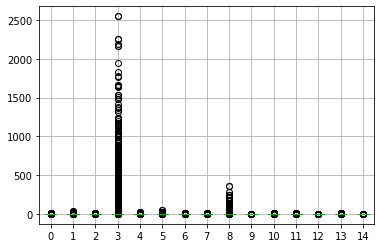

In [22]:
# Looking for outliers

X_train.iloc[:,0:15].boxplot()
plt.show()

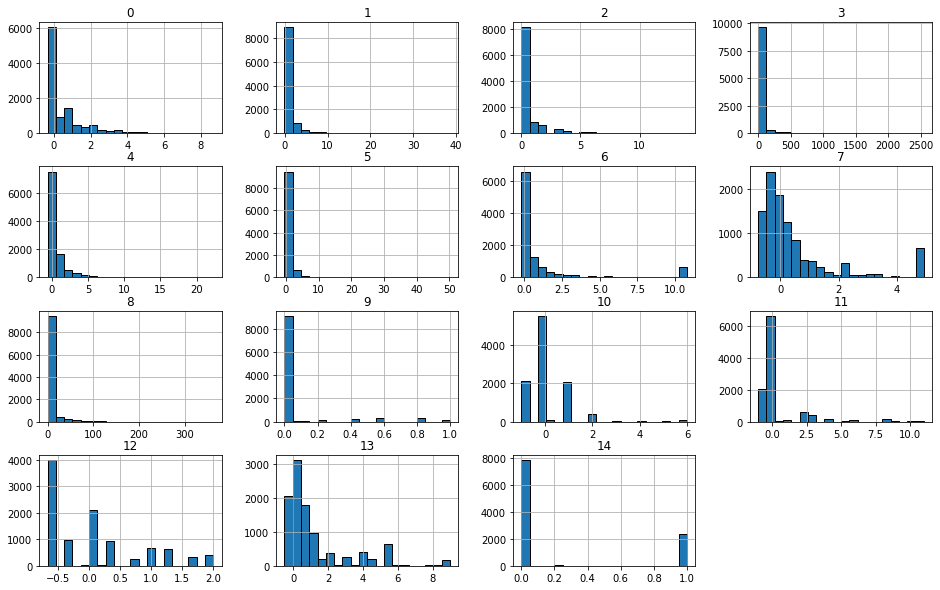

In [23]:
# Looking at the attributes distribution 

X_train.iloc[:,0:15].hist(bins = 20, edgecolor = 'black', figsize = (16,10))
plt.show()

In [24]:
X_train.shape, y_train.shape

((10311, 39), (10311, 1))

*This shows these features are left/right skewed.*

In [25]:
lof = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
y_pred = lof.fit_predict(X_train.iloc[:,0:15])

X_train = X_train[y_pred != -1]
y_train = y_train[y_pred != -1]

In [26]:
# Shape after removing outlier

X_train.shape, y_train.shape

((9280, 39), (9280, 1))

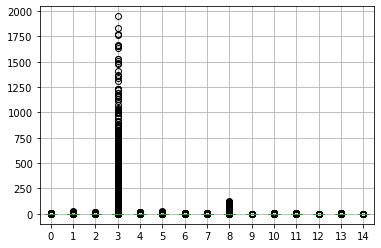

In [27]:
X_train.iloc[:,0:15].boxplot()
plt.show()

In [28]:
# Defining shuffle split

cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

# Applying Models

In [29]:
model_score = {}

# Baseline model
#### Creating a baseline model using LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')

print('\n')
print("Accuracy of Logistic Regression with default parameter value:", accuracy)
print("Precision of Logistic Regression with default parameter value:", precision)
print('f1 score of Logistic Regression with default parameter value:', f1)
model_score['Baseline model(logistic regression)'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of Logistic Regression with default parameter value: 0.6549773755656109
Precision of Logistic Regression with default parameter value: 0.7116935483870968
f1 score of Logistic Regression with default parameter value: 0.5428520349612223


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      2685
           1       0.71      0.20      0.32      1735

    accuracy                           0.65      4420
   macro avg       0.68      0.58      0.54      4420
weighted avg       0.67      0.65      0.59      4420



### Hypertuning Baseline Model

In [31]:
param_grid = {'penalty':['l1', 'l2', 'elasticnet'],
              'C':[0.12, 0.25, 0.75, 1]}
grid_search_lr = GridSearchCV(lr,
                              param_grid=param_grid,
                              cv = cv)
grid_search_lr.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=LogisticRegression(),
             param_grid={'C': [0.12, 0.25, 0.75, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [32]:
model_lr = grid_search_lr.best_estimator_
model_lr

LogisticRegression(C=0.75)

In [33]:
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')

print('\n')
print("Accuracy of Logistic Regression with hypertuning:", accuracy)
print("Precision of Logistic Regression with hypertuning:", precision)
print('f1 score of Logistic Regression with hypertuning:', f1)
model_score['Hypertuned Baseline model'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of Logistic Regression with hypertuning: 0.6545248868778281
Precision of Logistic Regression with hypertuning: 0.7096774193548387
f1 score of Logistic Regression with hypertuning: 0.5422524966464173


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.95      0.77      2685
           1       0.71      0.20      0.32      1735

    accuracy                           0.65      4420
   macro avg       0.68      0.57      0.54      4420
weighted avg       0.67      0.65      0.59      4420



# KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors = 60)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of KNN:", accuracy)
print("Precision of KNN:", precision)
print('f1 score of KNN:', f1)
model_score['KNN'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of KNN: 0.6565610859728507
Precision of KNN: 0.6940966010733453
f1 score of KNN: 0.5531882078702102


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.94      0.77      2685
           1       0.69      0.22      0.34      1735

    accuracy                           0.66      4420
   macro avg       0.67      0.58      0.55      4420
weighted avg       0.67      0.66      0.60      4420



### Hypertuning KNN

In [35]:
param_grid = {'n_neighbors':[5, 15, 25, 35, 70],
              'weights':['uniform', 'distance'],
             'algorithm':['auto', 'brute']}
grid_search_knn = GridSearchCV(knn,
                              param_grid = param_grid,
                              cv = cv)
grid_search_knn.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=KNeighborsClassifier(n_neighbors=60),
             param_grid={'algorithm': ['auto', 'brute'],
                         'n_neighbors': [5, 15, 25, 35, 70],
                         'weights': ['uniform', 'distance']})

In [36]:
model_knn = grid_search_knn.best_estimator_
model_knn

KNeighborsClassifier(n_neighbors=70)

In [37]:
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')

print('\n')
print("Accuracy of KNN with hypertuning:", accuracy)
print("Precision of KNN with hypertuning:", precision)
print('f1 score of KNN with hypertuning:', f1)
model_score['Hypertuned KNN'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of KNN with hypertuning: 0.6572398190045249
Precision of KNN with hypertuning: 0.6923076923076923
f1 score of KNN with hypertuning: 0.5557017020918307


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.93      0.77      2685
           1       0.69      0.23      0.34      1735

    accuracy                           0.66      4420
   macro avg       0.67      0.58      0.56      4420
weighted avg       0.67      0.66      0.60      4420



# SVM

In [38]:
svm = SVC(C = 30)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of SVM:", accuracy)
print("Precision of SVM:", precision)
print('f1 score of SVM:', f1)
model_score['SVM'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of SVM: 0.6592760180995475
Precision of SVM: 0.7026548672566372
f1 score of SVM: 0.5574710809732748


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.94      0.77      2685
           1       0.70      0.23      0.35      1735

    accuracy                           0.66      4420
   macro avg       0.68      0.58      0.56      4420
weighted avg       0.67      0.66      0.60      4420



### Hypertuning SVM

In [39]:
param_grid = {'C':[0.5, 15, 35, 55],
             'gamma':['scale', 'auto']}
grid_search_svm = GridSearchCV(svm,
                              param_grid = param_grid,
                              cv = cv)
grid_search_svm.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=SVC(C=30),
             param_grid={'C': [0.5, 15, 35, 55], 'gamma': ['scale', 'auto']})

In [40]:
model_svm = grid_search_svm.best_estimator_
model_svm

SVC(C=55)

In [41]:
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')

print('\n')
print("Accuracy of SVM with hypertuning:", accuracy)
print("Precision of SVM with hypertuning:", precision)
print('f1 score of SVM with hypertuning:', f1)
model_score['Hypertuned SVM'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of SVM with hypertuning: 0.6588235294117647
Precision of SVM with hypertuning: 0.697391304347826
f1 score of SVM with hypertuning: 0.5581259985547887


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.94      0.77      2685
           1       0.70      0.23      0.35      1735

    accuracy                           0.66      4420
   macro avg       0.68      0.58      0.56      4420
weighted avg       0.67      0.66      0.60      4420



# CART

In [42]:
dtc = DecisionTreeClassifier(max_depth = 2, random_state = 0)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of DecisionTreeClassifier with default parameter value:", accuracy)
print("Precision of DecisionTreeClassifier with default parameter value:", precision)
print('f1 score of DecisionTreeClassifier with default parameter value:', f1)
model_score['Decision tree classifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of DecisionTreeClassifier with default parameter value: 0.6622171945701357
Precision of DecisionTreeClassifier with default parameter value: 0.6592105263157895
f1 score of DecisionTreeClassifier with default parameter value: 0.583149908958974


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.90      0.76      2685
           1       0.66      0.29      0.40      1735

    accuracy                           0.66      4420
   macro avg       0.66      0.60      0.58      4420
weighted avg       0.66      0.66      0.62      4420



### Hypertuning CART

In [43]:
param_grid = {'criterion':['gini', 'entropy', 'log_loss'],
             'splitter':['best', 'random']}

grid_search_dtc = GridSearchCV(dtc,
                              param_grid = param_grid,
                              cv = cv)
grid_search_dtc.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=DecisionTreeClassifier(max_depth=2, random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']})

In [44]:
model_dtc = grid_search_dtc.best_estimator_
model_dtc

DecisionTreeClassifier(max_depth=2, random_state=0)

In [45]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [46]:
y_pred = model_dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of DecisionTreeClassifier with default parameter value:", accuracy)
print("Precision of DecisionTreeClassifier with default parameter value:", precision)
print('f1 score of DecisionTreeClassifier with default parameter value:', f1)
model_score['Hypertuned Decision tree classifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of DecisionTreeClassifier with default parameter value: 0.6622171945701357
Precision of DecisionTreeClassifier with default parameter value: 0.6592105263157895
f1 score of DecisionTreeClassifier with default parameter value: 0.583149908958974


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.90      0.76      2685
           1       0.66      0.29      0.40      1735

    accuracy                           0.66      4420
   macro avg       0.66      0.60      0.58      4420
weighted avg       0.66      0.66      0.62      4420



# Bagging

In [47]:
bc = BaggingClassifier(base_estimator = model_dtc, n_estimators = 32, random_state = 0)
bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of BaggingClassifier:", accuracy)
print("Precision of BaggingClassifier:", precision)
print('f1 score of BaggingClassifier:', f1)
model_score['BaggingClassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of BaggingClassifier: 0.6642533936651583
Precision of BaggingClassifier: 0.6740638002773925
f1 score of BaggingClassifier: 0.5816546659809132


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.91      0.77      2685
           1       0.67      0.28      0.40      1735

    accuracy                           0.66      4420
   macro avg       0.67      0.60      0.58      4420
weighted avg       0.67      0.66      0.62      4420



### Hypertuning BaggingClassifier

In [48]:
param_grid = {'max_samples': [0.5, 0.6, 0.7],
             'max_features': [0.5, 0.7, 0.9]}

grid_search_bc = GridSearchCV(bc,
                             param_grid = param_grid,
                             cv = cv)

grid_search_bc.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                               random_state=0),
                                         n_estimators=32, random_state=0),
             param_grid={'max_features': [0.5, 0.7, 0.9],
                         'max_samples': [0.5, 0.6, 0.7]})

In [49]:
model_bc = grid_search_bc.best_estimator_
model_bc

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                        random_state=0),
                  max_features=0.7, max_samples=0.7, n_estimators=32,
                  random_state=0)

In [50]:
model_bc.fit(X_train, y_train)
y_pred = model_bc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of DecisionTreeClassifier with default parameter value:", accuracy)
print("Precision of DecisionTreeClassifier with default parameter value:", precision)
print('f1 score of DecisionTreeClassifier with default parameter value:', f1)
model_score['Hypertuned BaggingClassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of DecisionTreeClassifier with default parameter value: 0.6658371040723982
Precision of DecisionTreeClassifier with default parameter value: 0.6791666666666667
f1 score of DecisionTreeClassifier with default parameter value: 0.5835236289228032


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.91      0.77      2685
           1       0.68      0.28      0.40      1735

    accuracy                           0.67      4420
   macro avg       0.67      0.60      0.58      4420
weighted avg       0.67      0.67      0.62      4420



# Boosting

### AdaBoostClassifier

In [51]:
abc = AdaBoostClassifier(base_estimator = model_dtc, n_estimators = 100, random_state = 0)
abc.fit(X_train, y_train)

y_pred = abc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of AdaBoostClassifier:", accuracy)
print("Precision of AdaBoostClassifier:", precision)
print('f1 score of AdaBoostClassifier:', f1)
model_score['AdaBoostClassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of AdaBoostClassifier: 0.6361990950226244
Precision of AdaBoostClassifier: 0.5779141104294478
f1 score of AdaBoostClassifier: 0.5568839427662957


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.87      0.74      2685
           1       0.58      0.27      0.37      1735

    accuracy                           0.64      4420
   macro avg       0.61      0.57      0.56      4420
weighted avg       0.62      0.64      0.60      4420



#### Hypertuning AdaBoostClassifier

In [52]:
param_grid = {'n_estimators': [30, 50, 100, 200],
              'learning_rate': [0.01, 0.1, 1]}

grid_search_abc = GridSearchCV(abc, 
                              param_grid = param_grid,
                              cv = cv)
grid_search_abc.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                random_state=0),
                                          n_estimators=100, random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [30, 50, 100, 200]})

In [53]:
model_abc = grid_search_abc.best_estimator_
model_abc

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=0),
                   learning_rate=0.1, random_state=0)

In [54]:
model_abc.fit(X_train, y_train)
y_pred = model_abc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of AdaBoostClassifier with hypertuning:", accuracy)
print("Precision of AdaBoostClassifier with hypertuning:", precision)
print('f1 score of AdaBoostClassifier with hypertuning:', f1)
model_score['Hypertuned AdaBoostClassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of AdaBoostClassifier with hypertuning: 0.6601809954751131
Precision of AdaBoostClassifier with hypertuning: 0.6736214605067065
f1 score of AdaBoostClassifier with hypertuning: 0.5711400185682307


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.92      0.77      2685
           1       0.67      0.26      0.38      1735

    accuracy                           0.66      4420
   macro avg       0.67      0.59      0.57      4420
weighted avg       0.66      0.66      0.61      4420



### GradientBoostingClassifier

In [55]:
gbc = GradientBoostingClassifier(n_estimators = 30, random_state = 0)
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of GradientBoostingClassifier:", accuracy)
print("Precision of GradientBoostingClassifier:", precision)
print('f1 score of GradientBoostingClassifier:', f1)
model_score['Gradient boost classifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of GradientBoostingClassifier: 0.6631221719457013
Precision of GradientBoostingClassifier: 0.6927899686520376
f1 score of GradientBoostingClassifier: 0.5711391836580165


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.93      0.77      2685
           1       0.69      0.25      0.37      1735

    accuracy                           0.66      4420
   macro avg       0.68      0.59      0.57      4420
weighted avg       0.67      0.66      0.61      4420



#### Hypertuning GradientBoostClassifier

In [56]:
param_grid = {'n_estimators': [30, 100, 200],
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': [1, 2, 3]}

grid_search_gbc = GridSearchCV(gbc,
                              param_grid = param_grid,
                              cv = cv)

grid_search_gbc.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=GradientBoostingClassifier(n_estimators=30,
                                                  random_state=0),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [30, 100, 200]})

In [57]:
model_gbc = grid_search_gbc.best_estimator_
model_gbc

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200, random_state=0)

In [58]:
model_gbc.fit(X_train, y_train)
y_pred = model_gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of GradientBoostingClassifier with hypertuning:", accuracy)
print("Precision of GradientBoostingClassifier with hypertuning:", precision)
print('f1 score of GradientBoostingClassifier with hypertuning:', f1)
model_score['Hypertuned GradientBoostClassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of GradientBoostingClassifier with hypertuning: 0.6635746606334841
Precision of GradientBoostingClassifier with hypertuning: 0.7
f1 score of GradientBoostingClassifier with hypertuning: 0.5696395569065965


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.93      0.77      2685
           1       0.70      0.25      0.37      1735

    accuracy                           0.66      4420
   macro avg       0.68      0.59      0.57      4420
weighted avg       0.67      0.66      0.61      4420



### XGBClassifier

In [59]:
xgb = XGBClassifier(n_estimators = 10, random_state = 0)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of XGBClassifier:", accuracy)
print("Precision of XGBClassifier:", precision)
print('f1 score of XGBClassifier:', f1)
model_score['XGBclassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of XGBClassifier: 0.6504524886877828
Precision of XGBClassifier: 0.6507936507936508
f1 score of XGBClassifier: 0.5540565028937122


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      2685
           1       0.65      0.24      0.35      1735

    accuracy                           0.65      4420
   macro avg       0.65      0.58      0.55      4420
weighted avg       0.65      0.65      0.60      4420



In [60]:
model_score

{'Baseline model(logistic regression)': 0.543,
 'Hypertuned Baseline model': 0.542,
 'KNN': 0.553,
 'Hypertuned KNN': 0.556,
 'SVM': 0.557,
 'Hypertuned SVM': 0.558,
 'Decision tree classifier': 0.583,
 'Hypertuned Decision tree classifier': 0.583,
 'BaggingClassifier': 0.582,
 'Hypertuned BaggingClassifier': 0.584,
 'AdaBoostClassifier': 0.557,
 'Hypertuned AdaBoostClassifier': 0.571,
 'Gradient boost classifier': 0.571,
 'Hypertuned GradientBoostClassifier': 0.57,
 'XGBclassifier': 0.554}

# MLP

In [61]:
mlpc = MLPClassifier(hidden_layer_sizes = (4,),
                     activation = 'logistic',
                     solver = 'lbfgs',
                     alpha = 0.00001,
                     learning_rate = 'adaptive',
                     max_iter = 250,
                     random_state = 0)
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of MLPClassifier:", accuracy)
print("Precision of MLPClassifier:", precision)
print('f1 score of MLPClassifier:', f1)
model_score['MLPclassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))



Accuracy of MLPClassifier: 0.6638009049773755
Precision of MLPClassifier: 0.6554307116104869
f1 score of MLPClassifier: 0.5891572523178914


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.67      0.90      0.76      2685
           1       0.66      0.30      0.41      1735

    accuracy                           0.66      4420
   macro avg       0.66      0.60      0.59      4420
weighted avg       0.66      0.66      0.63      4420



In [62]:
model_score

{'Baseline model(logistic regression)': 0.543,
 'Hypertuned Baseline model': 0.542,
 'KNN': 0.553,
 'Hypertuned KNN': 0.556,
 'SVM': 0.557,
 'Hypertuned SVM': 0.558,
 'Decision tree classifier': 0.583,
 'Hypertuned Decision tree classifier': 0.583,
 'BaggingClassifier': 0.582,
 'Hypertuned BaggingClassifier': 0.584,
 'AdaBoostClassifier': 0.557,
 'Hypertuned AdaBoostClassifier': 0.571,
 'Gradient boost classifier': 0.571,
 'Hypertuned GradientBoostClassifier': 0.57,
 'XGBclassifier': 0.554,
 'MLPclassifier': 0.589}

In [63]:
from sklearn.ensemble import VotingClassifier

In [64]:
voting_clf = VotingClassifier(estimators=[('model1', model_dtc), ('model2', model_bc), ('model3', mlpc)], voting='hard')

In [65]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=0)),
                             ('model2',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                      random_state=0),
                                                max_features=0.7,
                                                max_samples=0.7,
                                                n_estimators=32,
                                                random_state=0)),
                             ('model3',
                              MLPClassifier(activation='logistic', alpha=1e-05,
                                            hidden_layer_sizes=(4,),
                                            learning_rate='adaptive',
                                            max_iter=250, ra

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay



Accuracy of VotingClassifier: 0.6638009049773755
Precision of VotingClassifier: 0.6623207301173403
f1 score of VotingClassifier: 0.5858081600355562


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.66      0.90      0.77      2685
           1       0.66      0.29      0.41      1735

    accuracy                           0.66      4420
   macro avg       0.66      0.60      0.59      4420
weighted avg       0.66      0.66      0.62      4420



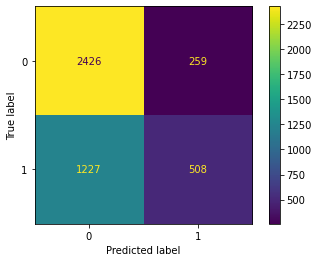

In [67]:
y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = 'macro')
print('\n')
print("Accuracy of VotingClassifier:", accuracy)
print("Precision of VotingClassifier:", precision)
print('f1 score of VotingClassifier:', f1)
model_score['Votingclassifier'] = f1.round(3)
print('\n')
print('Classification Report')
print('---------------------')
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Predictions

In [68]:
test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  Month_SeasonalPurchase           6541 non-null   object 
 11  OS                               6537 non-null   float64
 12  SearchEngine        

In [69]:
test_data = test_data[new_columns]

In [70]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         6548 non-null   float64
 1   HomePage_Duration                6544 non-null   float64
 2   LandingPage                      6543 non-null   float64
 3   LandingPage_Duration             6524 non-null   float64
 4   ProductDescriptionPage           6541 non-null   float64
 5   ProductDescriptionPage_Duration  6536 non-null   float64
 6   GoogleMetric:Bounce Rates        6533 non-null   float64
 7   GoogleMetric:Exit Rates          6548 non-null   float64
 8   GoogleMetric:Page Values         6554 non-null   float64
 9   SeasonalPurchase                 6554 non-null   float64
 10  OS                               6537 non-null   float64
 11  SearchEngine                     6541 non-null   float64
 12  Zone                

In [71]:
test_data['Gender'] = test_data['Gender'].replace('Not Specified', np.nan)
test_data['Education'] = test_data['Education'].replace('Not Specified', 'Others')

In [72]:
for i in range(15,21):
    print(test_data.iloc[:,i].unique())
    print(len(test_data.iloc[:,i].unique()))

['Feb' 'Mar' 'May' 'June' 'Oct' 'Nov' 'Sep' 'Aug' 'Jul' 'Dec' nan]
11
['Returning_Visitor' 'New_Visitor' 'Other' nan]
4
[nan 'Female' 'Male']
3
['Deny' 'ALL' 'Required' nan]
4
['Others' 'Graduate' 'Diploma' nan]
4
['Single' 'Married' 'Other' nan]
4


In [73]:
X_t = pd.DataFrame(full_pipeline.fit_transform(test_data))

In [74]:
model_score

{'Baseline model(logistic regression)': 0.543,
 'Hypertuned Baseline model': 0.542,
 'KNN': 0.553,
 'Hypertuned KNN': 0.556,
 'SVM': 0.557,
 'Hypertuned SVM': 0.558,
 'Decision tree classifier': 0.583,
 'Hypertuned Decision tree classifier': 0.583,
 'BaggingClassifier': 0.582,
 'Hypertuned BaggingClassifier': 0.584,
 'AdaBoostClassifier': 0.557,
 'Hypertuned AdaBoostClassifier': 0.571,
 'Gradient boost classifier': 0.571,
 'Hypertuned GradientBoostClassifier': 0.57,
 'XGBclassifier': 0.554,
 'MLPclassifier': 0.589,
 'Votingclassifier': 0.586}

In [75]:
prediction = voting_clf.predict(X_t)

In [76]:
output = pd.DataFrame(prediction.astype(bool), columns = ['Made_Purchase'])
output.index.name = 'id'

In [77]:
output.to_csv('submission.csv')